In [2]:
#IT Ticket Category Prediction
#This dataset is about the IT Service Ticket Categeory Classification.
#By accurately classifying tickets, IT teams can prioritize tasks, allocate resources effectively, 
#and streamline the resolution process.
#The dataset contains ticket descriptions and category type as target field
#We train the dataset on the descriptions and map it to the target field using Supervised learning.
#The objective of the model is to classify which category a ticket should be assigned to.
#The following cells gives a glance about the dataset used.

#Name   : Ashwin Sai C
#Course : NLP - CS6320-001
#Title  : Text Classification using Logistic Regression, Naives Bayes and Neural Networks in Sklearn
#Term   : Spring 2024



In [3]:
import os
import itertools
import re
from   collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from   nltk.tokenize import word_tokenize
from   nltk.corpus import stopwords
from   nltk.stem import WordNetLemmatizer
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.preprocessing import LabelEncoder
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics import classification_report, accuracy_score
from   sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB, BernoulliNB
from   sklearn.neural_network import MLPClassifier

if __name__ == "__main__":
	print("hi")

hi


In [4]:
#Read the csv file
file_name = "all_tickets_processed_improved_v3.csv"
df = pd.read_csv(file_name)

In [5]:
#Print the head data section first 5 rows
#Sample data from the dataset IT Ticket category Prediction
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [6]:
#Describe the data set
df.describe()

,Document,Topic_group
count,47837,47837
unique,47837,8
top,connection with icon icon dear please setup ic...,Hardware
freq,1,13617


In [7]:
print("The list of IT Service Requests:\n")
df['Document']

The list of IT Service Requests:



0        connection with icon icon dear please setup ic...
1        work experience user work experience user hi w...
2        requesting for meeting requesting meeting hi p...
3        reset passwords for external accounts re expir...
4        mail verification warning hi has got attached ...
                               ...                        
47832    git space for a project issues with adding use...
47833    error sent july error hi guys can you help out...
47834    connection issues sent tuesday july connection...
47835    error cube reports sent tuesday july error hel...
47836    running out on extensions hello please be advi...
Name: Document, Length: 47837, dtype: object

In [8]:
print("The list of Topic_group:\n")
df['Topic_group']

The list of Topic_group:



0             Hardware
1               Access
2             Hardware
3               Access
4        Miscellaneous
             ...      
47832           Access
47833    Miscellaneous
47834         Hardware
47835       HR Support
47836         Hardware
Name: Topic_group, Length: 47837, dtype: object

In [9]:
#Unique topic group
topic_group_list = list(df['Topic_group'])
unique_topic_set = set(topic_group_list)
print("The different types of Topic groups:\n")
print(unique_topic_set)

The different types of Topic groups:

{'Internal Project', 'Access', 'Storage', 'Purchase', 'Administrative rights', 'HR Support', 'Miscellaneous', 'Hardware'}


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                Data Visualization
-------------------------------------------------------------------------------------------------------------------------------------------------------                                        

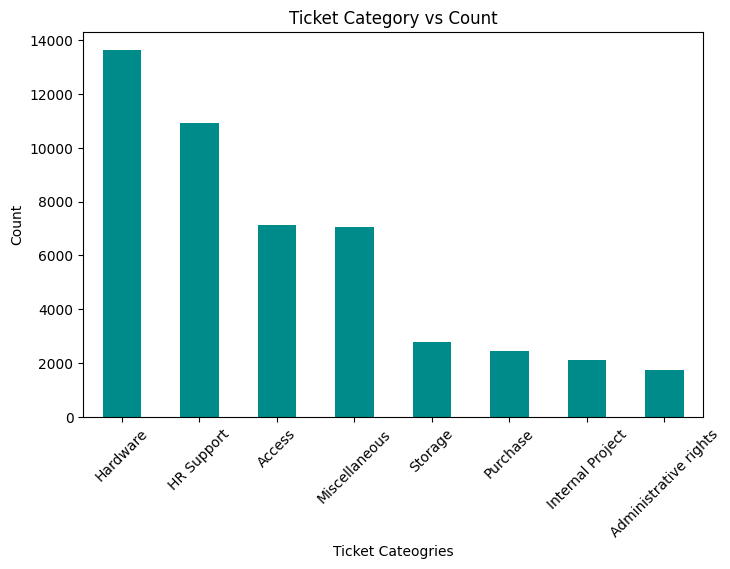

In [10]:
# Plot a bar chart of ticket categories and their counts
plt.figure(figsize=(8, 5))
df['Topic_group'].value_counts().plot(kind='bar', color='darkcyan')
plt.title('Ticket Category vs Count')
plt.xlabel('Ticket Cateogries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

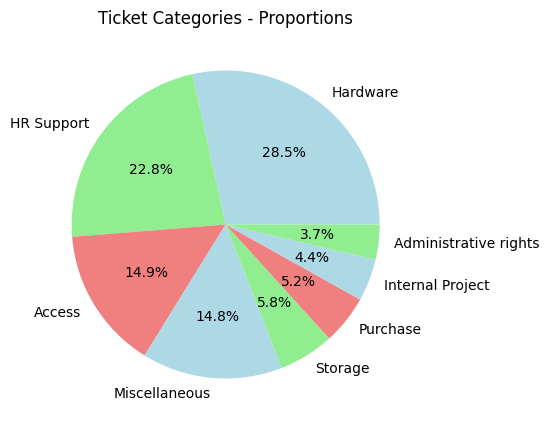

In [11]:
# Plot a pie chart of topic group proportions
plt.figure(figsize=(5, 5))
df['Topic_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Ticket Categories - Proportions')
plt.ylabel('')
plt.show()

In [12]:
X = list(df['Document'])
Y = list(df['Topic_group'])

print("Data length (X, Y) is (",len(X),",",len(Y),")")

Data length (X, Y) is ( 47837 , 47837 )


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                Data Preprocessing
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
#Data preprocessing

#lower case the documents
X_lower = [i.lower() for i in X]
print("----Lower casing of terms----")
#Tokenization
X_Tokens = [word_tokenize(i) for i in X_lower]
print("----Tokenization of terms----")
#Removable of Punctuation and Non-Alpha
X_alpha  = [[word for word in doc if word.isalnum()]for doc in X_Tokens]
print("----Filtering out alphanumeric terms----")
#Removal of stop words
stop_words = set(stopwords.words('english'))
X_without_stopwords = [[word for word in doc if word not in stop_words]for doc in X_alpha]
print("----Removing Stop words----")
#Lemmatize the words
lemmatizer = WordNetLemmatizer()
X_lemmas   = [[lemmatizer.lemmatize(word) for word in doc]for doc in X_without_stopwords]
print("----Lemmatization of terms----")

print("\nNo. of Documents:",len(X_lemmas))

----Lower casing of terms----
----Tokenization of terms----
----Filtering out alphanumeric terms----
----Removing Stop words----
----Lemmatization of terms----

No. of Documents: 47837


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                            TF-IDF Data Processing
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
#Using TF-IDF creating a Feature Matrix of words

tfidf_vectorizer = TfidfVectorizer()
X                = [" ".join(item) for item in X_lemmas]
X_tfidf          = tfidf_vectorizer.fit_transform(X)
print("FEature matrix :",X_tfidf.shape)


#Using LabelEncoder converting Y values into unique integers
# Encoding labels
def Y_Encoder_function(Y):
    label_encoder   = LabelEncoder()
    y_encoded       = label_encoder.fit_transform(Y)

    return y_encoded

Y_encoded = Y_Encoder_function(Y)
print("Y Prediction   : ",len(Y))


FEature matrix : (47837, 10495)
Y Prediction   :  47837


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Splitting the Datasets into Train and Test
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
#Splitting the TF-IDF data into Train and Test sets.
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(X_tfidf, Y_encoded, test_size=0.2, random_state=42)
print("No. of Full  Train rows : ",X_train_val.shape," ",y_train_val.shape)
print("No. of Final Test  rows : ",X_test_final.shape," ",y_test_final.shape)

#Further again spliting the Train data into Train-data and validation data

X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print("\nSplitting Train data again into Train data and Validation data:")
print("No. of Train rows : ",X_train.shape," ",y_train.shape)
print("No. of Test  rows : ",X_test.shape," ",y_test.shape)


No. of Full  Train rows :  (38269, 10495)   (38269,)
No. of Final Test  rows :  (9568, 10495)   (9568,)

Splitting Train data again into Train data and Validation data:
No. of Train rows :  (30615, 10495)   (30615,)
No. of Test  rows :  (7654, 10495)   (7654,)


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                              Logistic Regression
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
#Logistic Regression Algorithm : Train and Validation

logreg_model = LogisticRegression(max_iter=1000,C=10)
logreg_model.fit(X_train,y_train)

y_pred       = logreg_model.predict(X_test)
print("Training Model Accuracy:")
print("Logistic Regression\n")
print(classification_report(y_test,y_pred))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),5)*100,"%")



Training Model Accuracy:
Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1122
           1       0.85      0.64      0.73       298
           2       0.84      0.84      0.84      1772
           3       0.79      0.86      0.83      2140
           4       0.91      0.76      0.83       356
           5       0.80      0.82      0.81      1114
           6       0.97      0.89      0.93       396
           7       0.92      0.88      0.90       456

    accuracy                           0.84      7654
   macro avg       0.87      0.82      0.84      7654
weighted avg       0.84      0.84      0.84      7654

Accuracy :  84.048 %


In [19]:
#Logistic Regression Algorithm : Test

logreg_model = LogisticRegression(max_iter=1000,C=10)
logreg_model.fit(X_train_val,y_train_val)
y_pred       = logreg_model.predict(X_test_final)
print("Test Model Accuracy:")
print("Logistic Regression\n")
print(classification_report(y_test_final,y_pred))
print("Accuracy : ",round(accuracy_score(y_test_final,y_pred),5)*100,"%")

Test Model Accuracy:
Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1455
           1       0.82      0.70      0.75       342
           2       0.83      0.83      0.83      2107
           3       0.81      0.85      0.83      2760
           4       0.90      0.82      0.86       451
           5       0.80      0.84      0.82      1400
           6       0.95      0.90      0.92       497
           7       0.91      0.86      0.88       556

    accuracy                           0.84      9568
   macro avg       0.86      0.83      0.85      9568
weighted avg       0.84      0.84      0.84      9568

Accuracy :  84.197 %


In [20]:
#Creating unique sorted list of words

combined_unique_list        = list(itertools.chain.from_iterable(X_lemmas))
word_count                  = Counter(combined_unique_list)
word_count_sorted_by_values = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
top_1000_words              = list(word_count_sorted_by_values.keys())[:1000]
combined_unique_set         = set(combined_unique_list)
sorted_set                  = sorted(combined_unique_set)

print("No. of unique words in documents: ",len(sorted_set))

No. of unique words in documents:  10502


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                Data Representations : Bag of Words & Bernoulli Vector
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
#Trying out different data representation model for training and testing.
#Bag of words Representation
#Bernoulli Representation

X_bag_of_words = []
X_Bernoulli    = []
Y              = list(df['Topic_group'])
Y_encoded      = Y_Encoder_function(Y)

for line in X_lemmas:
    temp    = []
    tempBER = []
    for word in top_1000_words:
        if word in line:
            count    = line.count(word)
            countBER = 1
        else:
            count    = 0
            countBER = 0
        temp.append(count)
        tempBER.append(countBER)
    X_bag_of_words.append(temp)
    X_Bernoulli.append(tempBER)

print("Bag of words Matrix: instance vs features")
X_bag_of_words_array = np.array(X_bag_of_words)
print(X_bag_of_words_array.shape)
print("Bernoulli's Representation Matrix: instance vs features")
X_Bernoulli_array    = np.array(X_Bernoulli)
print(X_Bernoulli_array.shape)


Bag of words Matrix: instance vs features
(47837, 1000)
Bernoulli's Representation Matrix: instance vs features
(47837, 1000)


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                        Naives Bayes : Multinomial
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
#Naives Bayes Algorithm using Bag of words
#Multinomial

X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words_array, Y_encoded, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_Bernoulli_array, Y_encoded, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred   = nb_model.predict(X_test)
print("Model Accuracy:")
print("Multinomial Naives Bayes\n")
print(classification_report(y_test,y_pred))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),5)*100," %")


Model Accuracy:
Multinomial Naives Bayes

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1455
           1       0.56      0.75      0.64       342
           2       0.83      0.67      0.74      2107
           3       0.81      0.73      0.77      2760
           4       0.64      0.85      0.73       451
           5       0.71      0.75      0.73      1400
           6       0.92      0.88      0.90       497
           7       0.67      0.90      0.77       556

    accuracy                           0.76      9568
   macro avg       0.74      0.80      0.76      9568
weighted avg       0.77      0.76      0.76      9568

Accuracy :  75.993  %


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                            Naives Bayes : Bernoulli
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
#Naives Bayes Algorithm using Bernoulli's Vector
#Bernoulli

# X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words_array, Y_encoded, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_Bernoulli_array, Y_encoded, test_size=0.2, random_state=42)

nb_model = BernoulliNB(fit_prior=True)
nb_model.fit(X_train,y_train)
y_pred   = nb_model.predict(X_test)
print("Model Accuracy:")
print("Bernoulli Naives Bayes\n")
print(classification_report(y_test,y_pred))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),5)*100," %")


Model Accuracy:
Bernoulli Naives Bayes

              precision    recall  f1-score   support

           0       0.49      0.79      0.61      1455
           1       0.61      0.63      0.62       342
           2       0.75      0.64      0.69      2107
           3       0.75      0.56      0.64      2760
           4       0.64      0.77      0.70       451
           5       0.65      0.62      0.64      1400
           6       0.97      0.85      0.91       497
           7       0.62      0.79      0.70       556

    accuracy                           0.66      9568
   macro avg       0.69      0.71      0.69      9568
weighted avg       0.69      0.66      0.66      9568

Accuracy :  66.148  %


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                        Naives Bayes : Gaussian
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
#Naives Bayes Algorithm using Bernoulli's Vector
#GaussianNB

# X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words_array, Y_encoded, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_Bernoulli_array, Y_encoded, test_size=0.2, random_state=42)

nb_model = GaussianNB(var_smoothing=0.001)
nb_model.fit(X_train,y_train)
y_pred   = nb_model.predict(X_test)
print("Model Accuracy:")
print("Gaussian Naives Bayes\n")
print(classification_report(y_test,y_pred))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),5)*100," %")


Model Accuracy:
Gaussian Naives Bayes

              precision    recall  f1-score   support

           0       0.62      0.51      0.56      1455
           1       0.23      0.61      0.33       342
           2       0.71      0.50      0.59      2107
           3       0.67      0.29      0.41      2760
           4       0.27      0.76      0.40       451
           5       0.54      0.28      0.37      1400
           6       0.26      0.90      0.41       497
           7       0.40      0.76      0.53       556

    accuracy                           0.46      9568
   macro avg       0.46      0.58      0.45      9568
weighted avg       0.58      0.46      0.47      9568

Accuracy :  46.363  %


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                            Naives Bayes : Categorical
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
#Naives Bayes Algorithm using Bernoulli's Vector
#CategoricalNB

# X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words_array, Y_encoded, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_Bernoulli_array, Y_encoded, test_size=0.2, random_state=42)

nb_model = CategoricalNB(alpha=0.65)
nb_model.fit(X_train,y_train)
y_pred   = nb_model.predict(X_test)
print("Model Accuracy:")
print("Categorical Naives Bayes\n")
print(classification_report(y_test,y_pred))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),5)*100," %")


Model Accuracy:
Categorical Naives Bayes

              precision    recall  f1-score   support

           0       0.49      0.79      0.61      1455
           1       0.60      0.63      0.61       342
           2       0.75      0.64      0.69      2107
           3       0.74      0.56      0.64      2760
           4       0.65      0.78      0.71       451
           5       0.65      0.62      0.64      1400
           6       0.97      0.85      0.91       497
           7       0.62      0.79      0.69       556

    accuracy                           0.66      9568
   macro avg       0.69      0.71      0.69      9568
weighted avg       0.69      0.66      0.66      9568

Accuracy :  66.252  %


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                Neural Networks : Using Bag of Words Representation
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
#Neural Network sklearn using MultiLayer Perceptron Classifier
#Using Bag of Words Representation

n_layers = 200

X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words_array, Y_encoded, stratify=Y_encoded, random_state=42)

clf = MLPClassifier(random_state=42, max_iter=100,activation='relu',hidden_layer_sizes=(n_layers, 650))
clf.fit(X_train, y_train)
clf.predict_proba(X_test)
clf.predict(X_test)
print("MLPClassifier Model")
print("Bag of Words Representation")
print("Accuracy : ",round(clf.score(X_test, y_test),5)*100," %")

MLPClassifier Model
Bag of Words Representation
Accuracy :  84.114  %


In [27]:
print("Model Details: Using Bag of Words\n")
clf

Model Details: Using Bag of Words



MLPClassifier(hidden_layer_sizes=(200, 650), max_iter=100, random_state=42)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                Neural Network : Using Bernoulli Vector Representation
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
#Neural Network sklearn using MultiLayer Perceptron Classifier
#Using Bernoulli's Representation

n_layers = 100

X_train, X_test, y_train, y_test = train_test_split(X_Bernoulli_array, Y_encoded, stratify=Y_encoded, random_state=42)

clf = MLPClassifier(random_state=42, max_iter=100,activation='tanh',hidden_layer_sizes=(n_layers, 150))
clf.fit(X_train, y_train)
clf.predict_proba(X_test)
clf.predict(X_test)
print("MLPClassifier Model")
print("Bernoulli's Representation")
print("Accuracy : ",round(clf.score(X_test, y_test),5)*100," %")

MLPClassifier Model
Bernoulli's Representation
Accuracy :  80.192  %


In [29]:
print("Model Details: Using Bernoulli's Representation\n")
clf

Model Details: Using Bernoulli's Representation



MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 150), max_iter=100,
              random_state=42)

Performance Analysis:

Algorithm                                                Accuracy(%)

Logistic Regression                        :             84.19 %  

Naives Bayes using Multinomial             :             75.99 % 

Naives Bayes using Bernoulli               :             66.15 % 

Naives Bayes using Gaussian                :             46.36 % 

Naives Bayes using Categorical             :             66.25 % 

Neural Networks using Bag of Words         :             85.24 % 

Neural Networks using Bernoulli's Vector   :             81.60 % 



Logistic Regression: 

Achieves an accuracy of 84.19%. Logistic Regression is a simple yet effective linear classifier suitable for binary and multi-class classification tasks. It performs well when the relationship between features and target variable is approximately linear and when the classes are linearly separable.


Naive Bayes:

Multinomial Naive Bayes:
Multinomial Naive Bayes is commonly used for text classification tasks, especially when dealing with word frequency features. It assumes independence between features, which might not always hold true for text data. However, it performs well when the assumption of conditional independence is reasonable, and it handles sparse data efficiently.

Bernoulli Naive Bayes:
Bernoulli Naive Bayes is suitable for binary feature data, often used in binary text classification tasks. It models the presence or absence of each term in the document but may struggle with capturing the frequency information, which could lead to lower performance compared to Multinomial Naive Bayes which is correct with the above datasets.

Gaussian Naive Bayes:
Gaussian Naive Bayes assumes that features follow a Gaussian distribution, which is not typically the case for text data. Text data is sparse and discrete, making the Gaussian assumption inappropriate. This model may struggle to capture the underlying patterns in text data, leading to poor performance, which is also true based on the data above datasets.

Categorical Naive Bayes:
Categorical Naive Bayes is suitable for categorical features, which might represent different types of attributes in the text. It could perform reasonably well when the features are categorical rather than frequency-based or binary.

Decreasing order of Accuracy in Naives Bayes: Multinomial > Categorical > Bernoulli > Gaussian

Neural Networks:

Neural Networks, especially network models can effectively capture complex patterns in text data. Bag of Words representation, although simplistic, provides a dense representation of the text that neural networks can learn from. The flexibility and non-linearity of neural networks make them powerful for text classification tasks.

Using Bernoulli's Vector might refer to using a neural network with binary input features, similar to Bernoulli Naive Bayes. Neural networks can learn complex relationships between features, which could lead to better performance compared to the simpler assumptions made by Bernoulli Naive Bayes. However, it may not capture the frequency information as effectively as Bag of Words representation used in the previous neural network model. This indicates lower performance of this model compared to using Bag of words.



Based on the provided accuracies, Logistic Regression and Neural Networks using Bag of Words achieve the highest accuracies among the listed models, indicating their effectiveness in text classification tasks. Naive Bayes models perform reasonably well but may not capture complex patterns as effectively as neural networks. Gaussian Naive Bayes, in particular, seems to perform poorly, which is not surprising given its assumption of features following a Gaussian distribution, which is not typically the case for text data.